<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction to Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.3 - Exploratory data analysis
</div>

> - MSSV: **21120201**
> - Họ và tên: **Bùi Đình Bảo**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
movie_df=pd.read_csv('./../data/processed.csv')
movie_df.sample(10)

,Name,Released year,Genre,Director,Runtime (h),Score,Status,Language,Budget ($),Revenue ($)
3235,Evangelion: 1.0 You Are (Not) Alone,2007,"'Animation', 'Science Fiction', 'Action', 'Drama'",Hideaki Anno,1.68,76.0,Released,Japanese,NaN,20000000.0
1671,Babylon 5: The Road Home,2023,"'Animation', 'Science Fiction', 'Action', 'Adv...",Matt Peters,1.33,69.0,Released,English,NaN,NaN
2414,The Last of the Mohicans,1992,"'Action', 'Adventure', 'Drama', 'History', 'Ro...",Michael Mann,1.87,74.0,Released,English,40000000.0,75505856.0
1730,Strawberry Shortcake and the Beast of Berry Bog,2023,"'Animation', 'Family', 'TV Movie'",Jim Miller,NaN,72.0,Released,English,NaN,NaN
4794,The Book of Henry,2017,"'Drama', 'Crime', 'Thriller'",Colin Trevorrow,1.75,75.0,Released,English,10000000.0,4596705.0
3437,The Quiet Girl,2022,'Drama',Colm Bairéad,1.57,75.0,Released,Irish,NaN,1756887.0
1100,The Exorcism of Emily Rose,2005,"'Crime', 'Drama', 'Horror', 'Thriller'",Scott Derrickson,2.03,65.0,Released,English,19000000.0,145166804.0
3876,Death Wish 4: The Crackdown,1987,"'Action', 'Crime', 'Drama'",Brian Garfield,1.65,57.0,Released,English,5000000.0,6880310.0
1080,Chinatown,1974,"'Crime', 'Drama', 'Mystery', 'Thriller'",Roman Polanski,2.17,79.0,Released,English,6000000.0,30000000.0
4161,The Layover,2017,"'Comedy', 'Romance'",William H. Macy,1.47,54.0,Released,English,NaN,NaN


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5000 non-null   object 
 1   Released year  5000 non-null   int64  
 2   Genre          4994 non-null   object 
 3   Director       4995 non-null   object 
 4   Runtime (h)    4729 non-null   float64
 5   Score          5000 non-null   float64
 6   Status         5000 non-null   object 
 7   Language       5000 non-null   object 
 8   Budget ($)     3275 non-null   float64
 9   Revenue ($)    3385 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 390.8+ KB


> ***NOTE:***
>
> The dataset: Mẫu gồm 5000 bộ phim trong những bộ phim *phổ biến* theo https://www.themoviedb.org/movie
>
> Cột Status của dữ liệu hầu hết đều bằng giá trị "Released", vì có ít bộ phim được biết đến là trong quá trình sản xuất hay chỉ vừa sản xuất xong.
> 
> Vì là những bộ phim phổ biến trên thế giới nên ngôn ngữ của những bộ phim này hầu hết là tiếng Anh.


# Question: Lợi nhuận ròng và biên lợi nhuận ròng của ngành sản xuất phim qua từng năm (1961-nay)

## Step 0: Benefit

- Xác định xu hướng thị trường của ngành sản xuất phim từ trước đến nay, đặc biệt là những năm trở lại đây.
- Trả lời câu hỏi giúp đề ra chiến lược, quyết định xem có nên sản xuất phim trong thời điểm hiện tại hay không.

## Step 1: Preprocessing

In [4]:
cleaned_df = movie_df[['Released year','Budget ($)','Revenue ($)']].dropna()#.groupby('Released year').sum()
cleaned_df['Net profit'] = cleaned_df['Revenue ($)']-cleaned_df['Budget ($)']
cleaned_df['Net profit margin'] = (cleaned_df['Revenue ($)']-cleaned_df['Budget ($)'])/cleaned_df['Revenue ($)']
cleaned_df = cleaned_df.groupby('Released year').mean()
cleaned_df = cleaned_df.iloc[25:]
cleaned_df

,Budget ($),Revenue ($),Net profit,Net profit margin
Released year,,,,
1961,4.284250e+06,8.897500e+07,8.469075e+07,0.792492
1962,7.733333e+06,4.179871e+07,3.406538e+07,0.785605
1963,4.280000e+06,3.685647e+07,3.257647e+07,0.823427
1964,5.230000e+06,6.493319e+07,5.970319e+07,0.899623
1965,6.325000e+06,1.385671e+08,1.322421e+08,0.948515
...,...,...,...,...
2019,6.540769e+07,2.643783e+08,1.989706e+08,-3.027020
2020,5.444927e+07,9.609668e+07,4.164742e+07,-2.278529
2021,7.202993e+07,1.502569e+08,7.822694e+07,-13.504777


## Step 2: Visualization

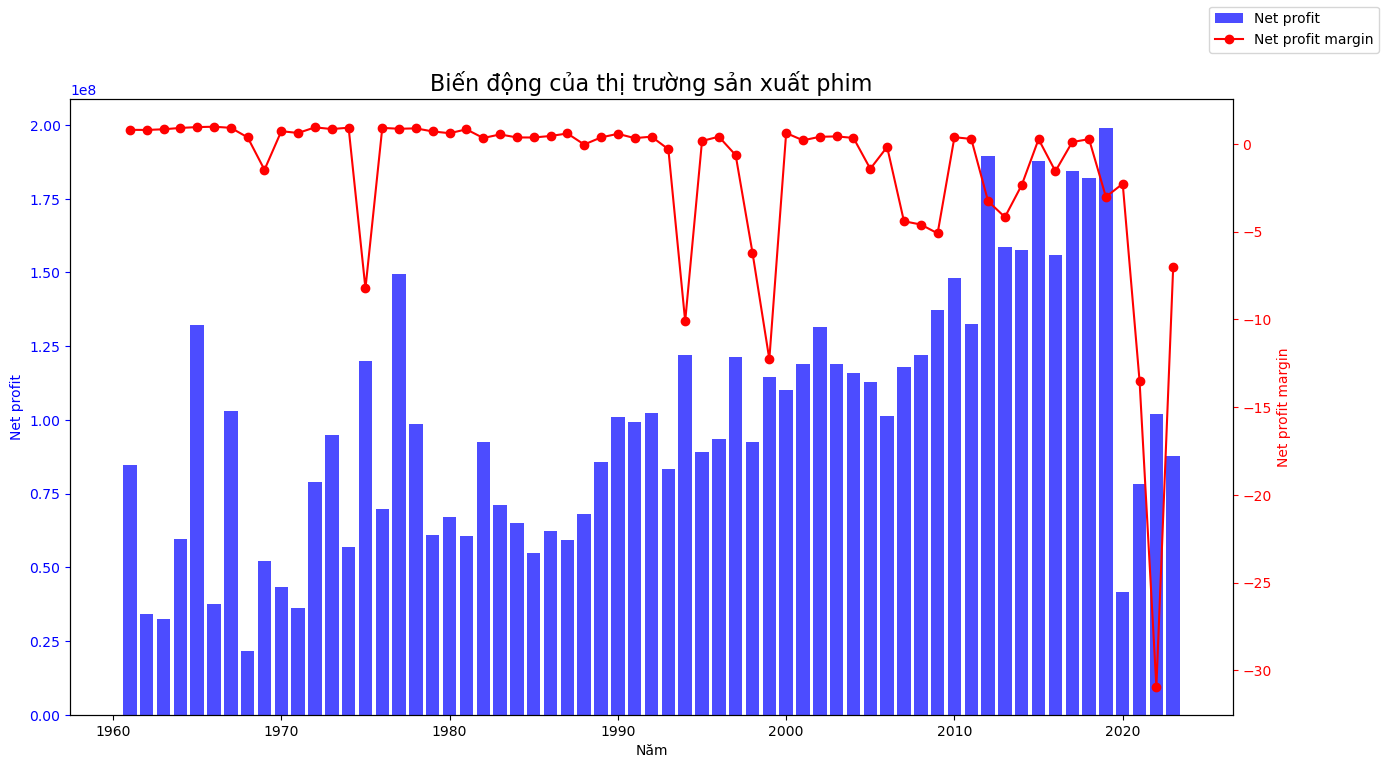

In [5]:
x = cleaned_df.index
y1 = cleaned_df['Net profit']
y2 = cleaned_df['Net profit margin']

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(15,8))

# Bar plot on the primary y-axis (left)
ax1.bar(x, y1, color='b', alpha=0.7, label='Net profit')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Net profit', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', linestyle='-', marker='o', label='Net profit margin')
ax2.set_ylabel('Net profit margin', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
fig.legend()

# Title for the entire plot
plt.title('Biến động của thị trường sản xuất phim',fontsize=16)

# Show the plot
plt.show()

## Step 3: Answer 

- Lợi nhuận trung bình hàng năm tăng dần theo thời gian.
- Biên lợi nhuận ròng đang có xu hướng giảm trong những năm trở lại đây, đặc biệt là trong giai đoạn cuả dịch COVID-19.
- Từ sau đợt dịch COVID-19, ngành làm phim đang có xu hướng tăng trưởng trở lại.
- Nhà sản xuất phim nên tập trung sản xuất lại trong thời điểm này.

# Question: Xác định thời lượng lý tưởng cho một bộ phim

## Step 0: Benefit

- Dùng để quyết định thời lượng lý tưởng cho một bộ phim khi đã quyết định sản xuất.
- Như thế nào là một thời lượng phim lý tưởng:
    - 

## Step 1: Preprocessing

In [6]:
cleaned_df = movie_df[['Runtime (h)', 'Score','Revenue ($)']].dropna()

## Step 2: Visualization

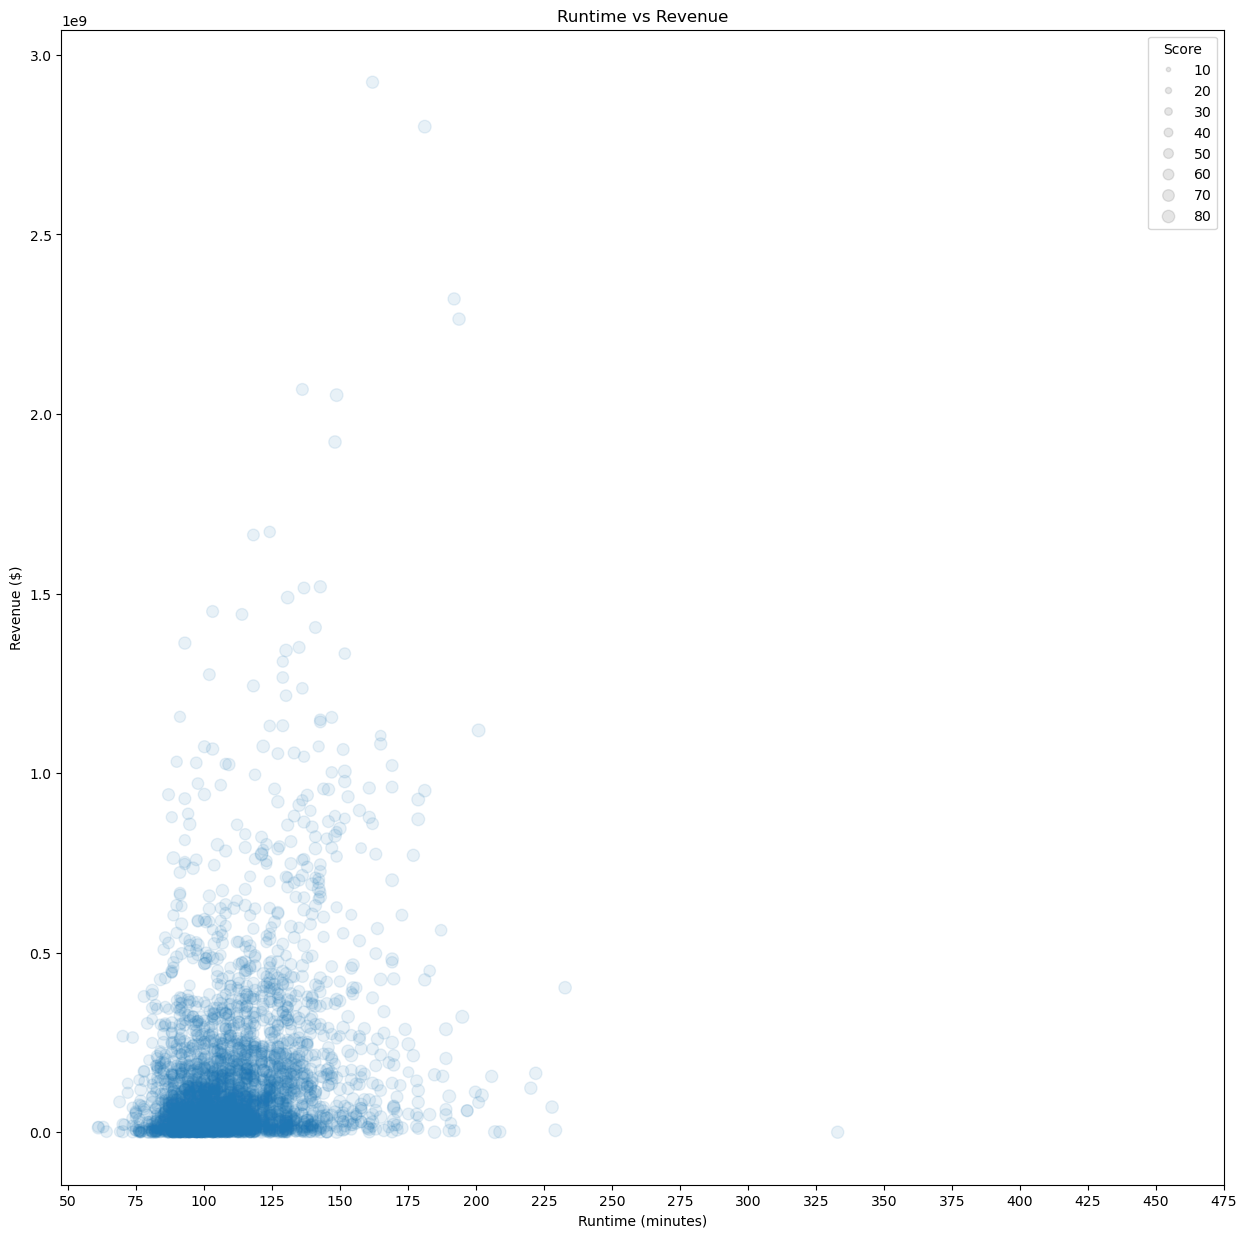

In [7]:
# Generate some random data
np.random.seed(42)
x = cleaned_df['Runtime (h)']*60
y = cleaned_df['Revenue ($)']
sizes = cleaned_df['Score']  # Random sizes for bubbles

# Create a scatter plot with bubble sizes
plt.figure(figsize =(15, 15)) 
sc = plt.scatter(x, y, s=sizes, alpha=0.1)

# Add labels and title
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue ($)')
plt.title('Runtime vs Revenue')
plt.legend(*sc.legend_elements("sizes"),title="Score")
plt.xticks(np.arange(50, 500, step=25))

# Show the plot
plt.show()


## Step 3: Answer

- Dựa vào Bubble plot (biểu đồ này thể hiện mối quan hệ giữa thời lượng của bộ phim so với doanh thu và điểm số tương ứng của bộ phim đó), ta có thể suy ra được thời lượng lý tưởng cho một bộ phim là từ 75 - 150 phút

# Question: Xác định sự biến đổi của số lượng phim trong từng thể loại qua từng năm (Heatmap)

## Step 0: Benefit

- Giúp nhà làm phim có thể có cái nhìn chung nhất về các thể loại phim được ưa chuộng theo thời gian.

## Step 1: Preprocessing

In [8]:
cleaned_df = movie_df[['Released year','Genre','Name']].dropna()
cleaned_df['Genre'] = cleaned_df['Genre'].str.split(', ')
cleaned_df = cleaned_df.explode('Genre').groupby(['Released year','Genre']).count().rename(columns={"Name": "Count"}).unstack(0,fill_value=0)
cleaned_df.columns = cleaned_df.columns.get_level_values(1)

In [9]:
cleaned_df.index.name = None
cleaned_df = cleaned_df.sort_values(2023,ascending=False)

## Step 2: Visualization

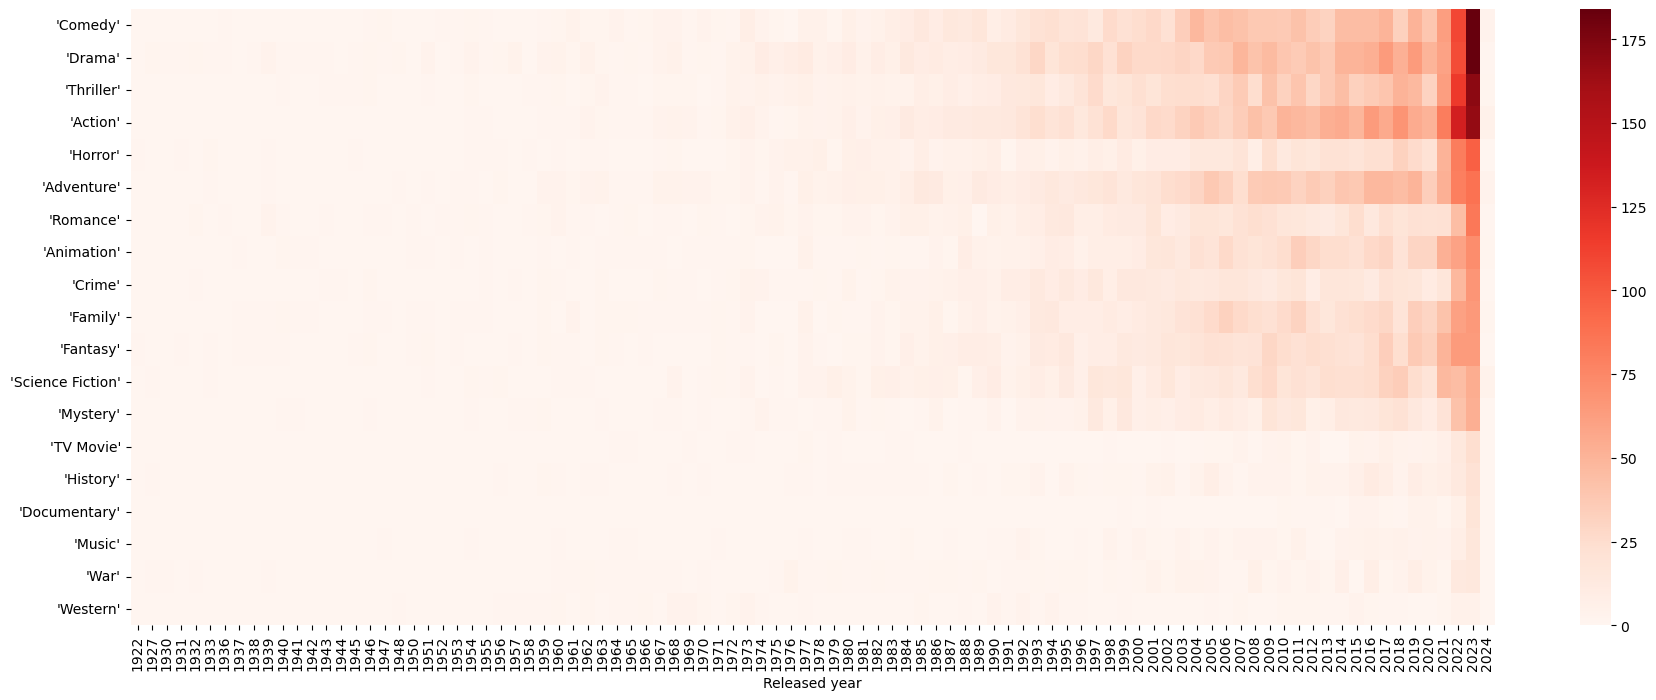

In [10]:
plt.figure(figsize =(22, 8)) 
sns.heatmap(cleaned_df,cmap='Reds')
plt.show()

## Step 3: Answer

- Nhìn chung, tổng số lượng phim phổ biến tăng dần theo thời gian, từ đó việc cạnh tranh trên thị trường điện ảnh cũng trở nên gay gắt hơn.
- Những thể loại phim phổ biến được sản xuất là `Comedy`, `Drama`, `Thriller`, `Action`.

# Question: Xác định những bộ phim đáng xem nhất của từng thể loại

## Step 0: Benefit 

- Giúp người xem lựa chọn bộ phim để xem một cách dễ dàng hơn.
- Quy ước một bộ phim đáng xem là những bộ phim thỏa mãn lần lượt 2 yếu tố sau:
    - Doanh thu khủng: > 100.000.000 $.
    - Trong các bộ phim có doanh thu khủng ở trên, chọn ra những bộ phim có đánh giá cao nhất, đó chính là những bộ phim cần tìm.
- Để thuận tiện ta chỉ lấy top 10 bộ phim đáng xem nhất cho từng thể loại.

## Step 1: Preprocessing

In [11]:
cleaned_df = movie_df[movie_df['Revenue ($)']>100000000][['Name','Genre','Score','Revenue ($)']].reset_index(drop=True)
cleaned_df['Genre'] = cleaned_df['Genre'].str.split(', ')
cleaned_df = cleaned_df.explode('Genre').sort_values(['Genre','Score'],ascending=[True,False]).groupby('Genre').head(10)

## Step 2: Visualization

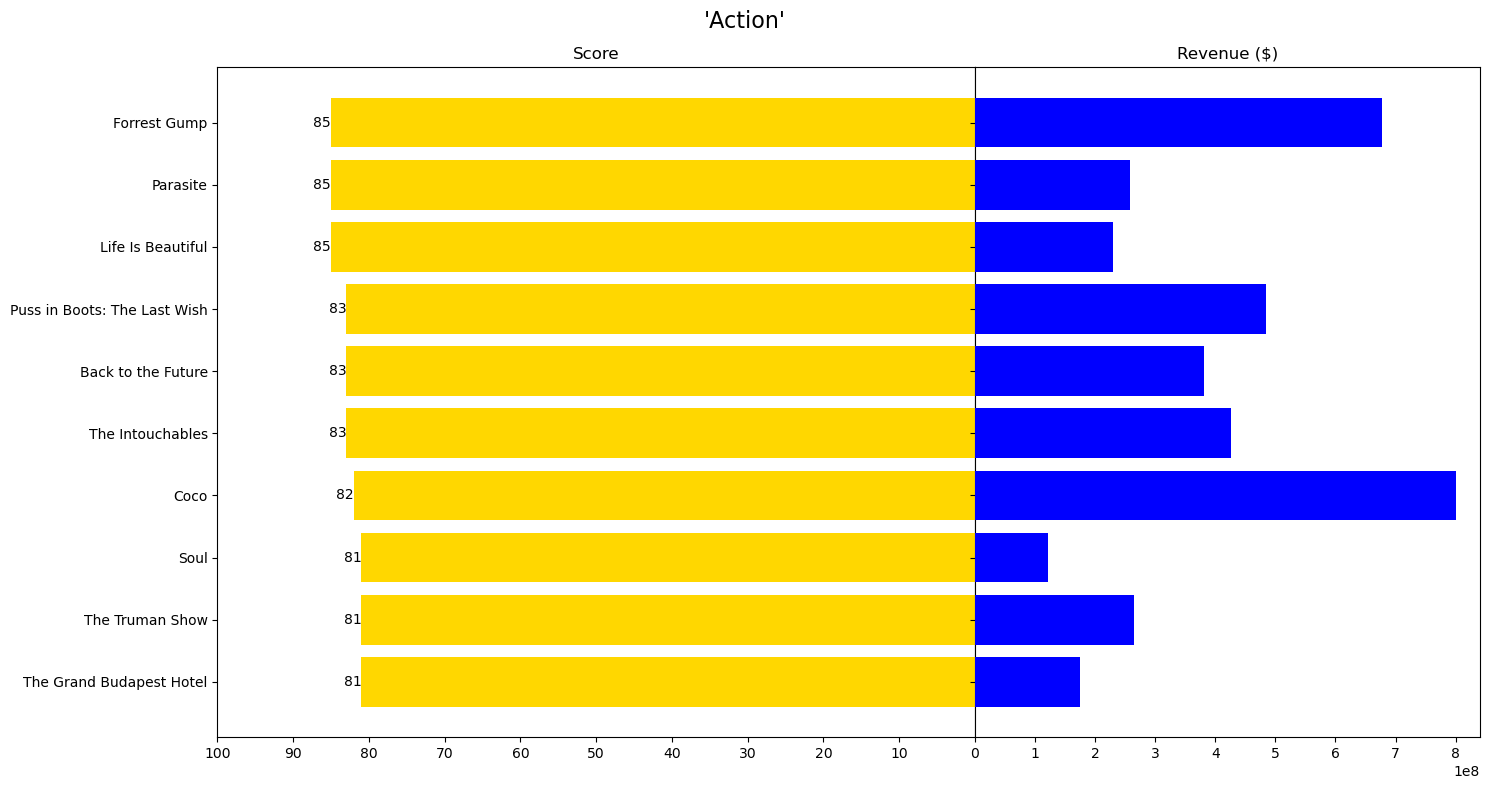

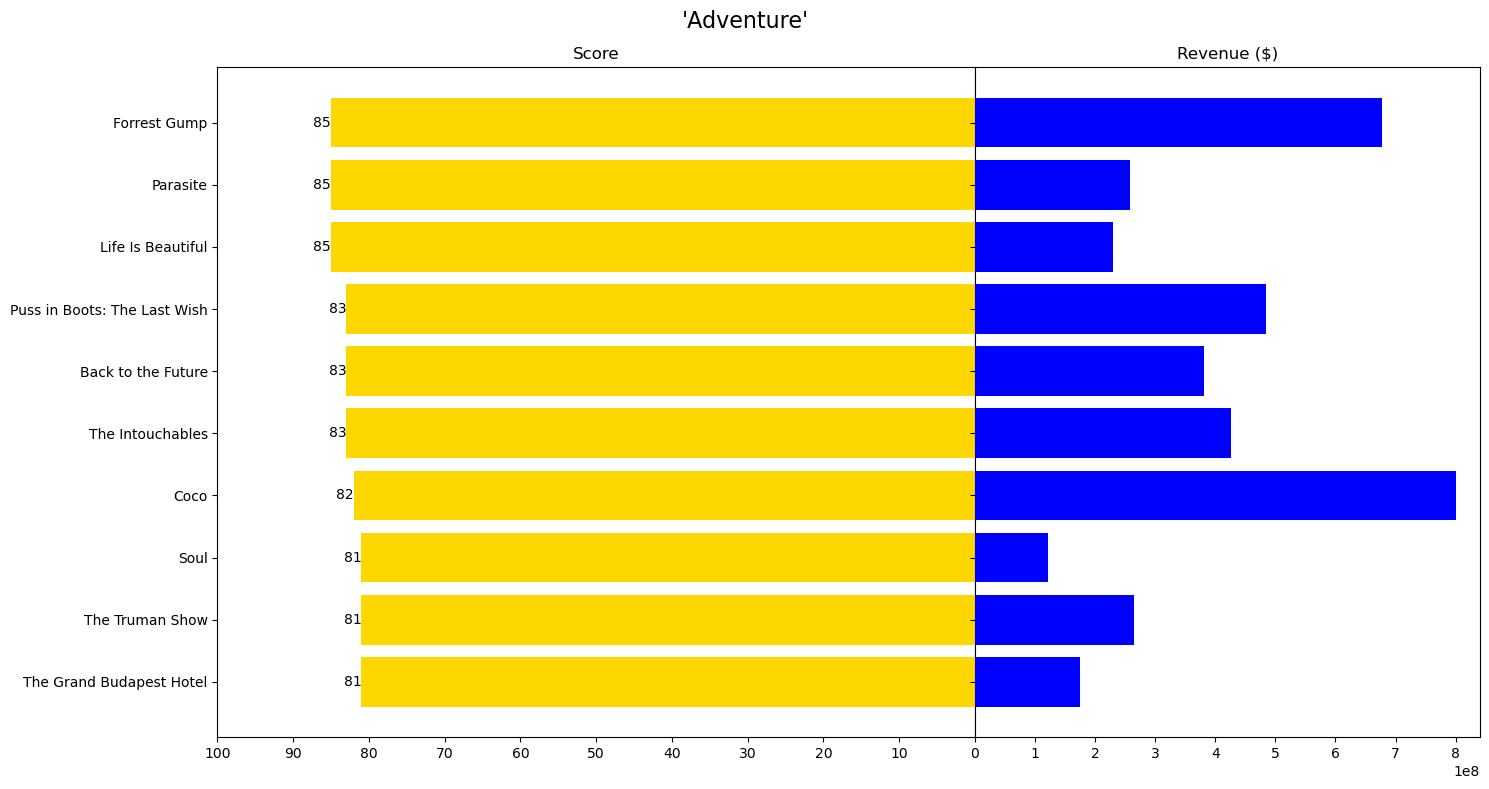

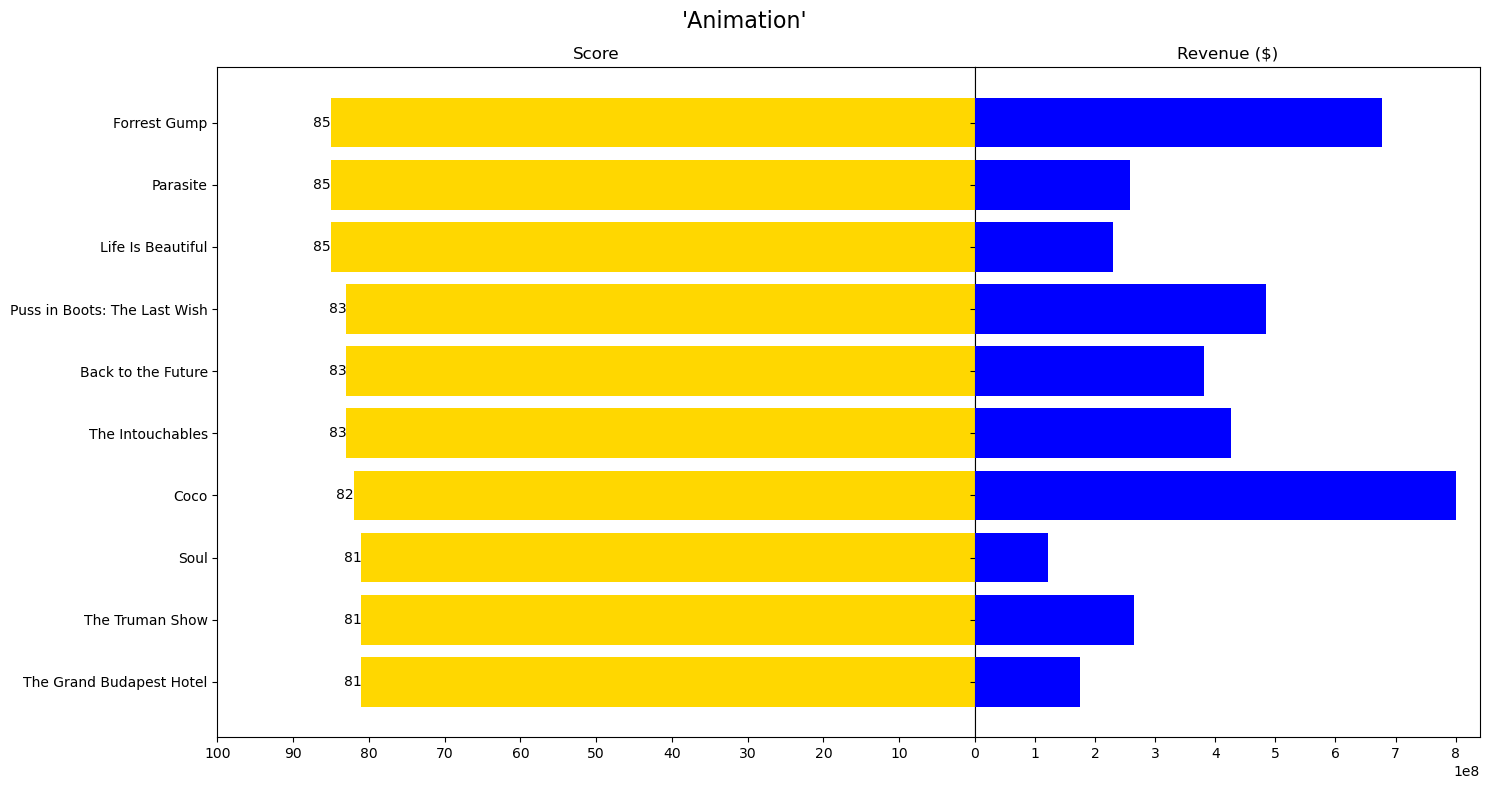

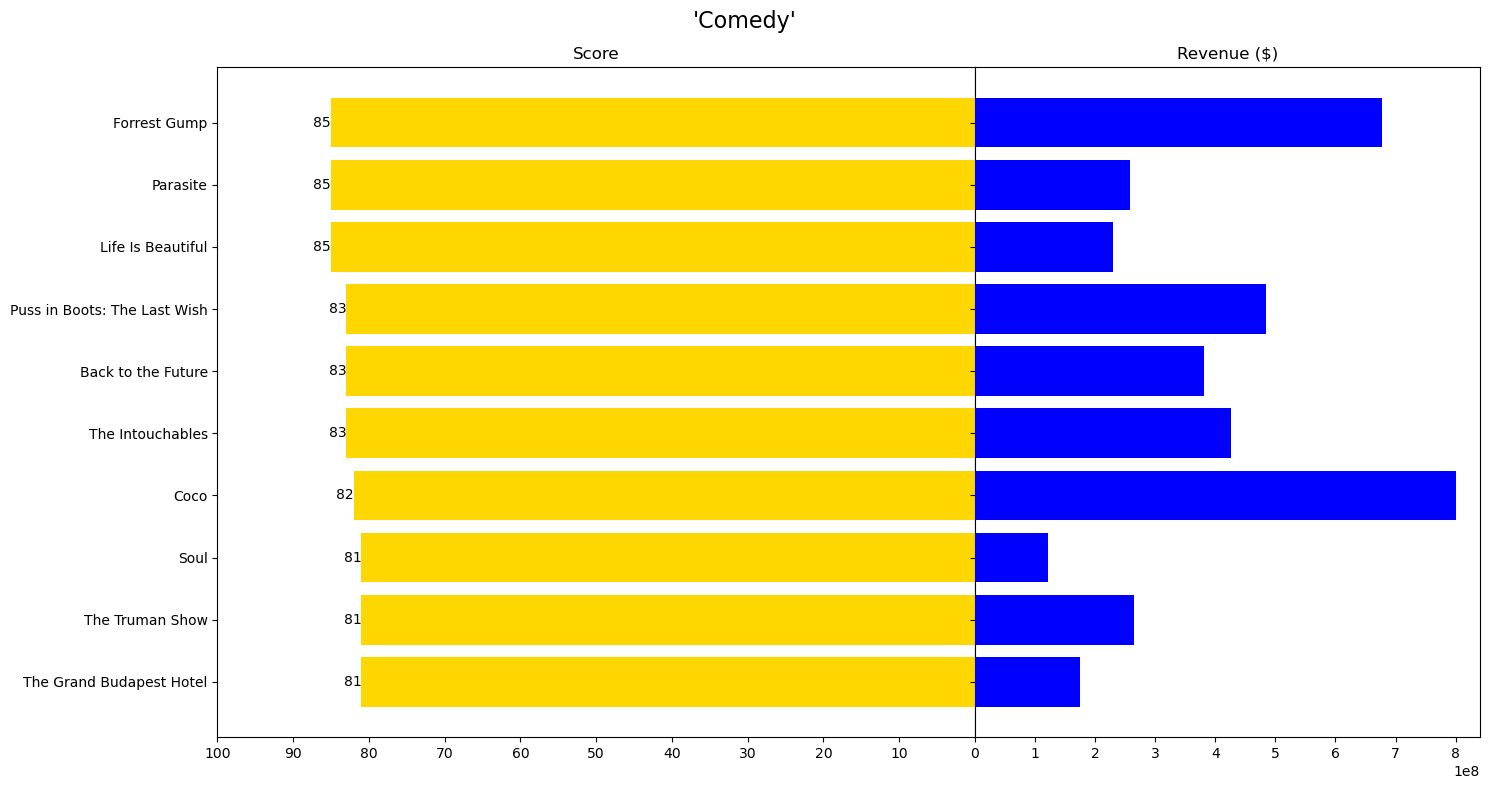

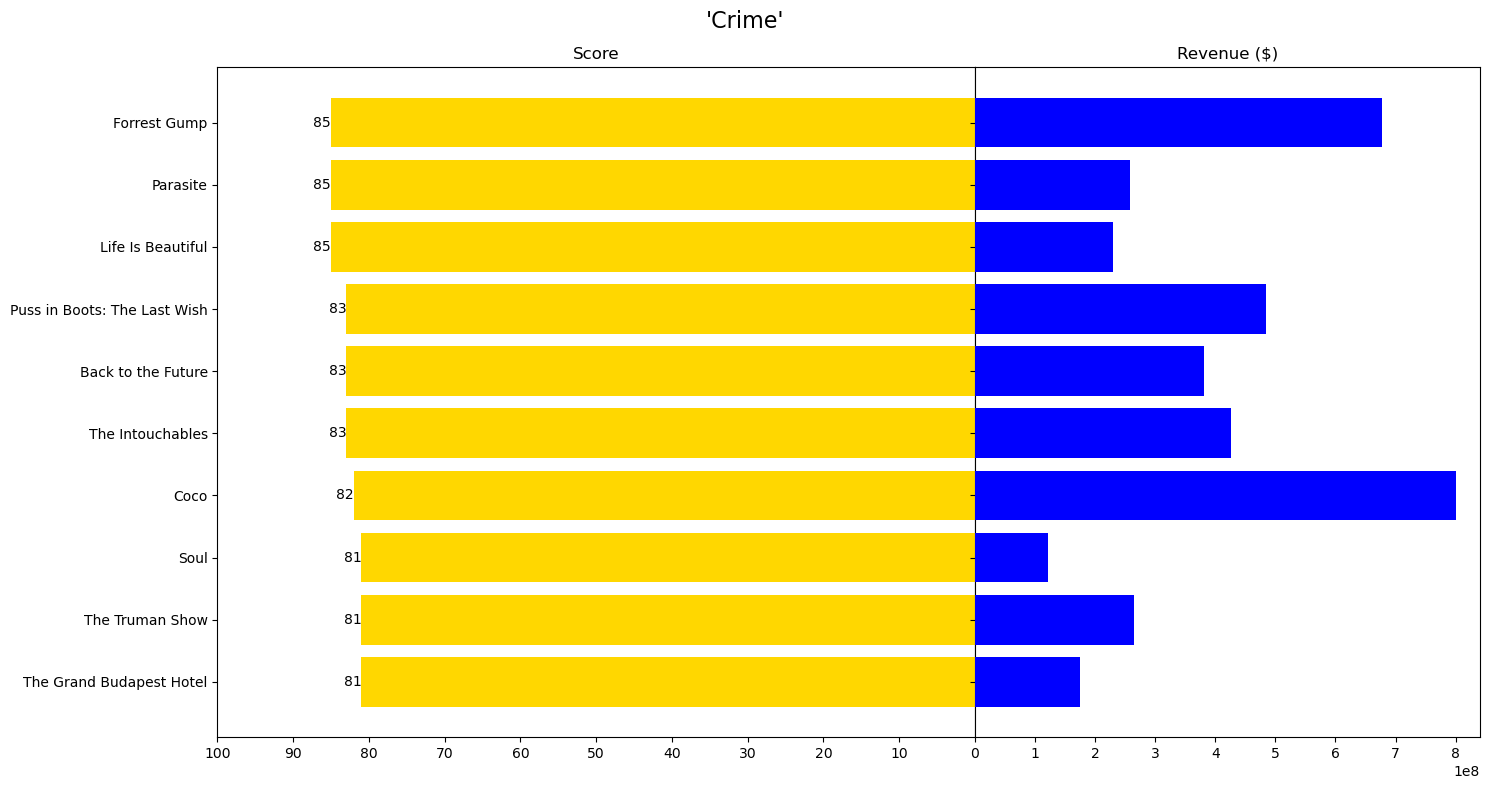

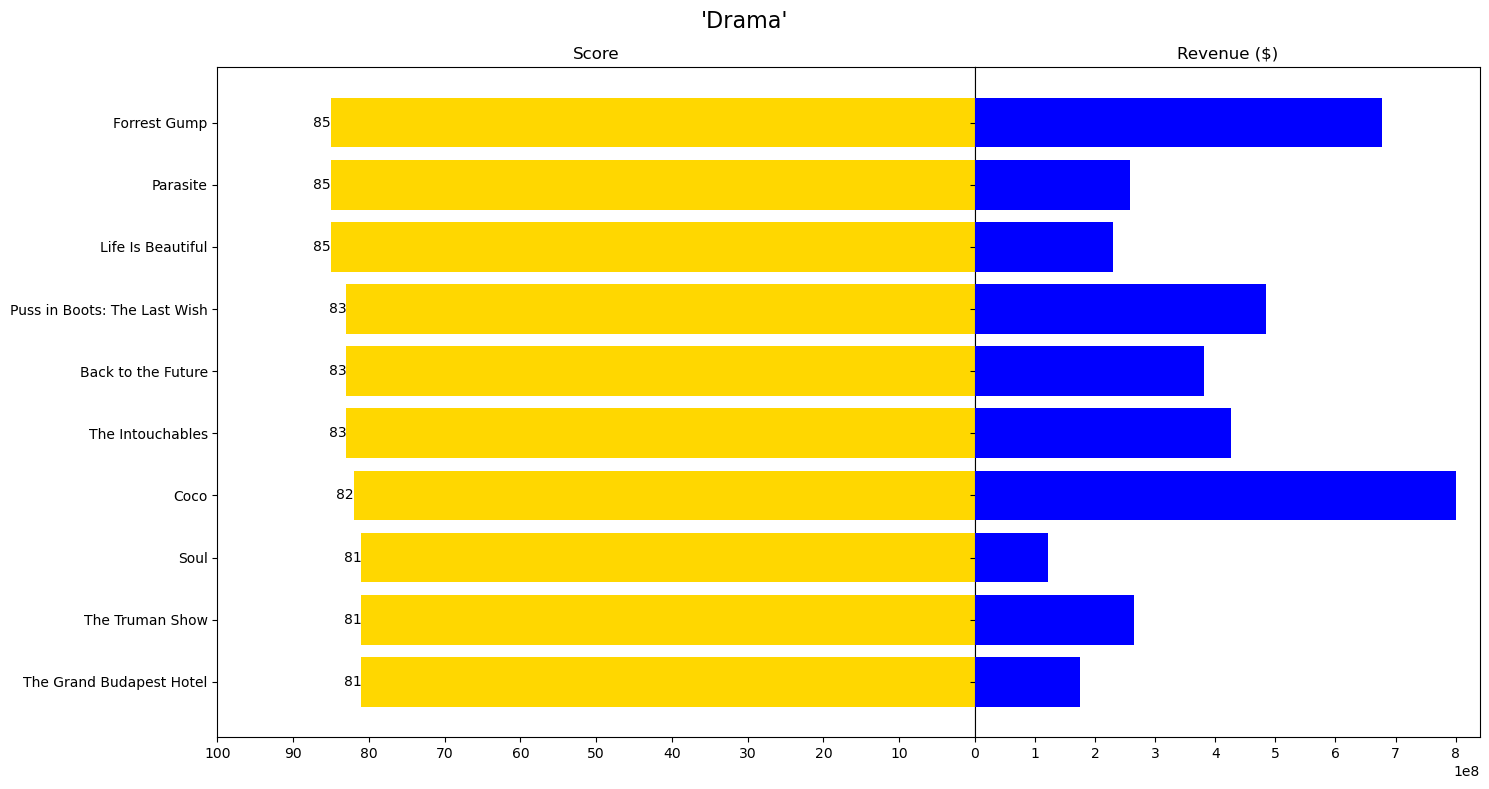

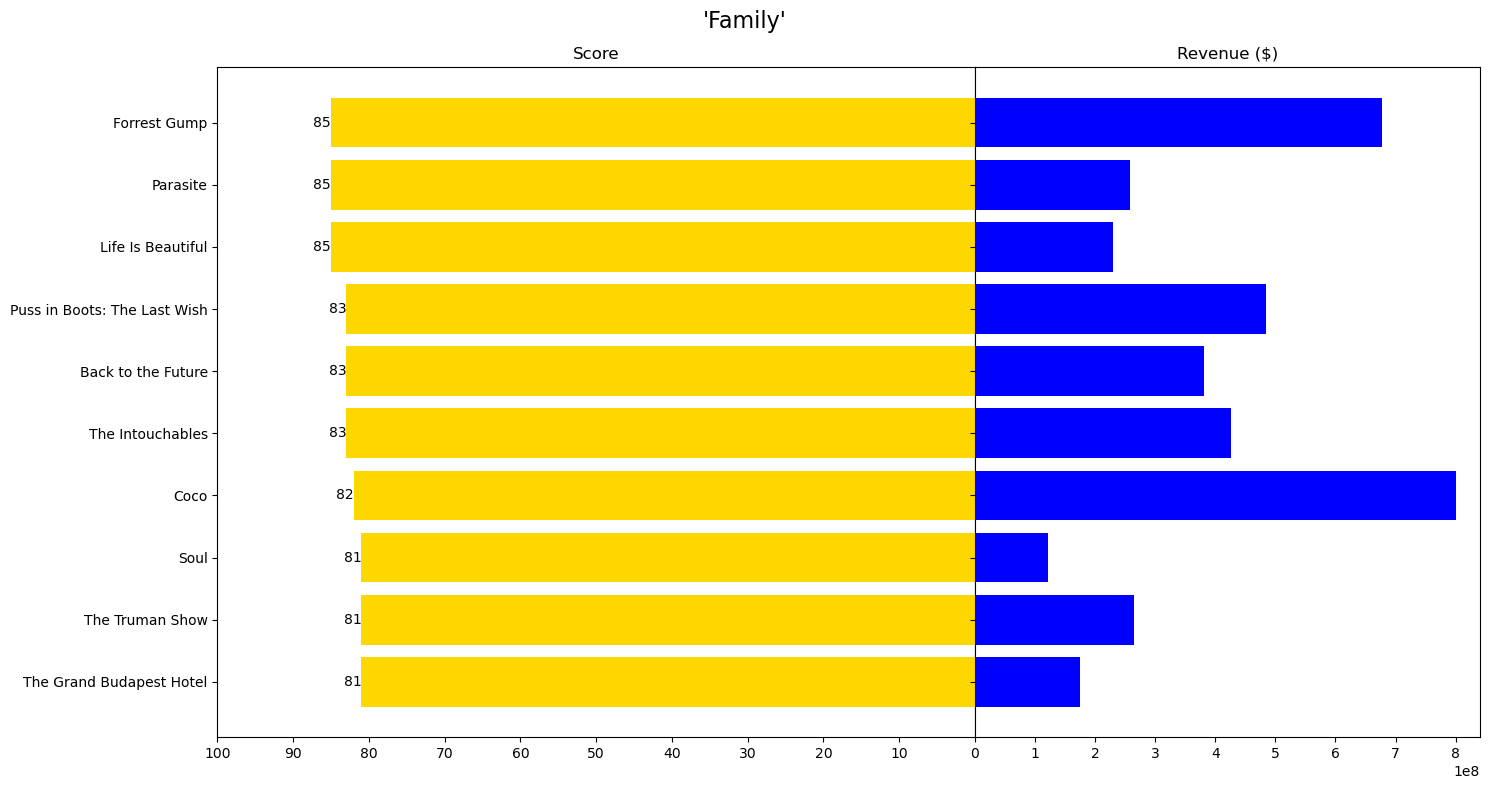

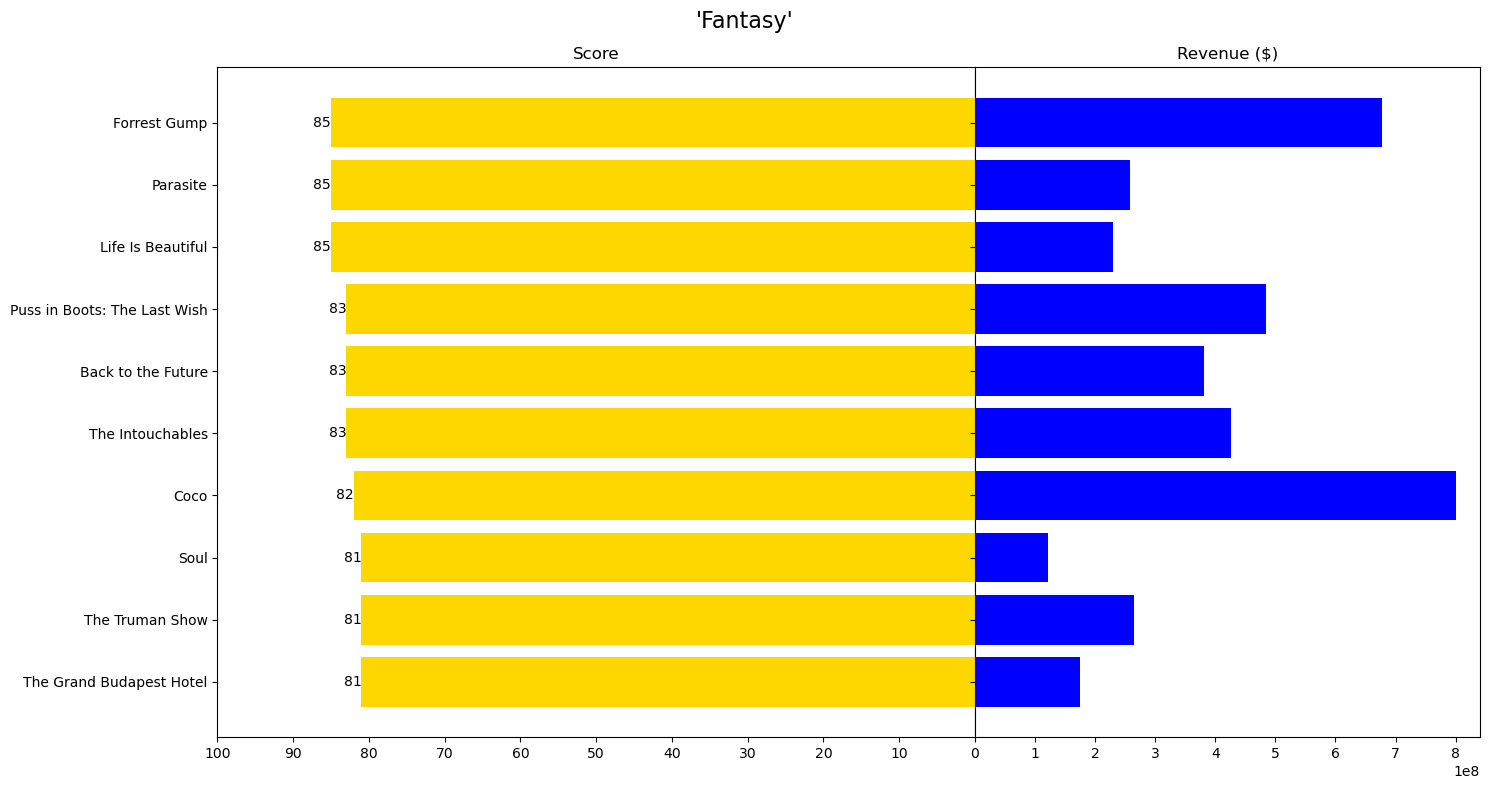

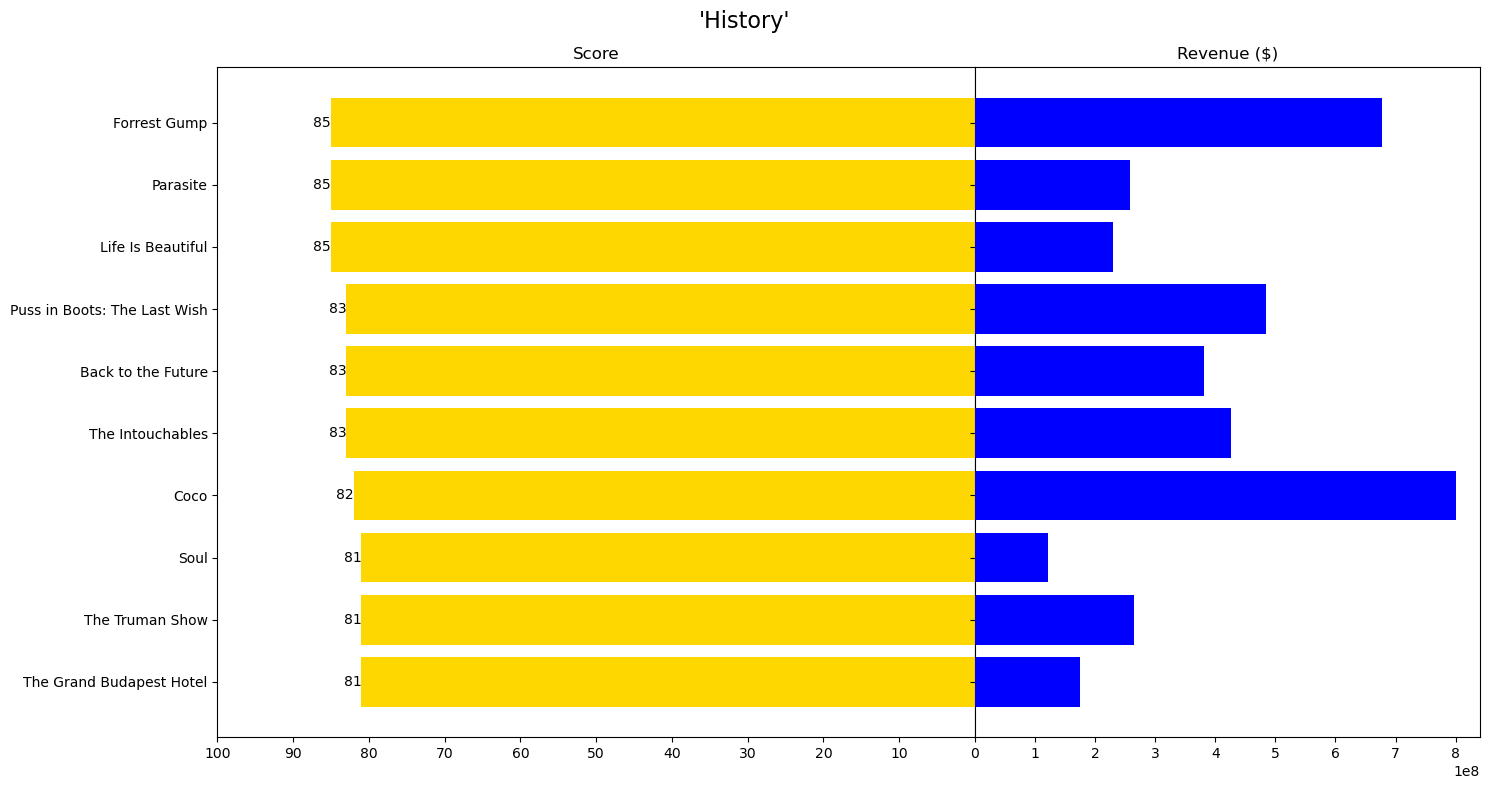

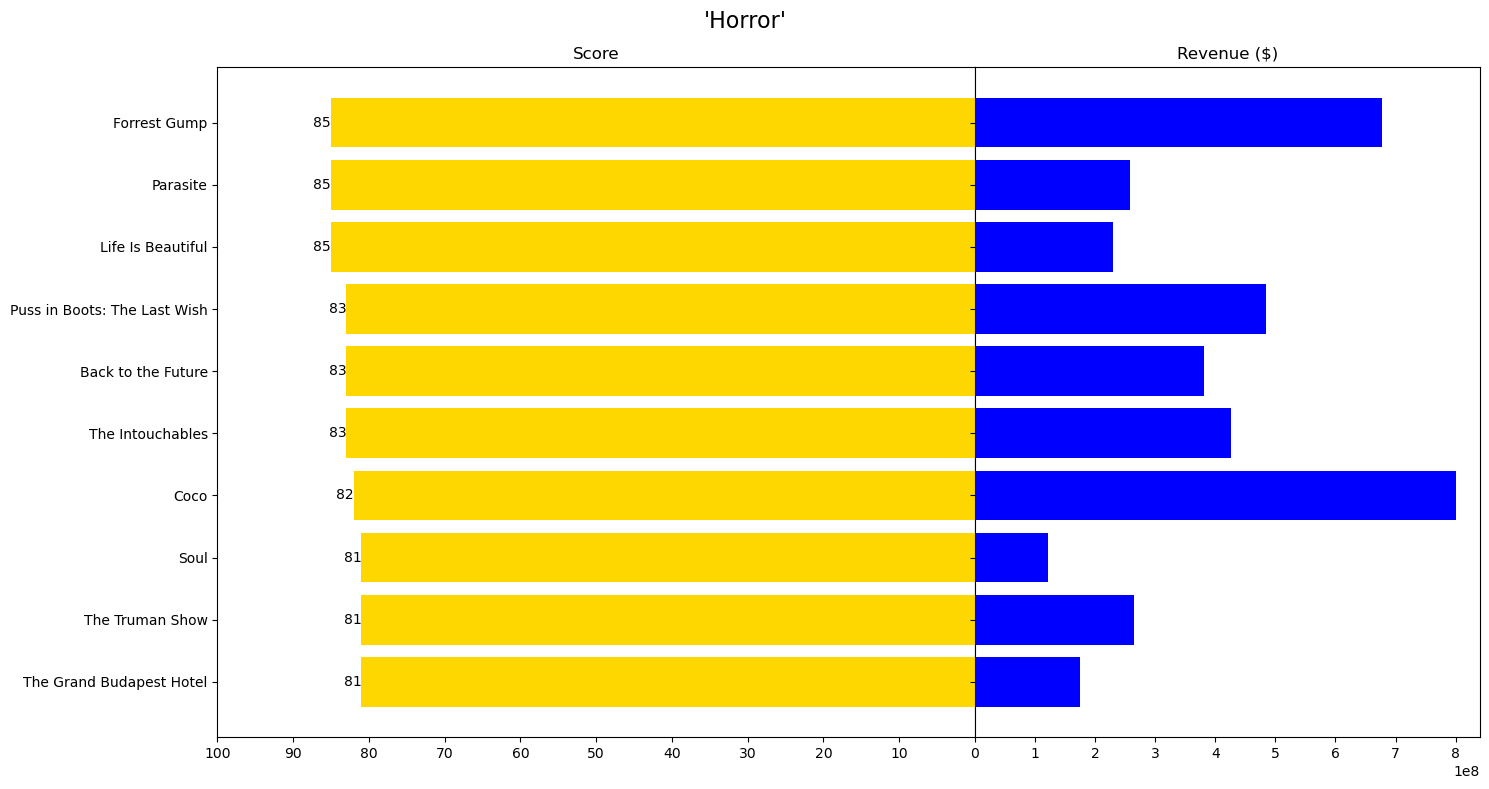

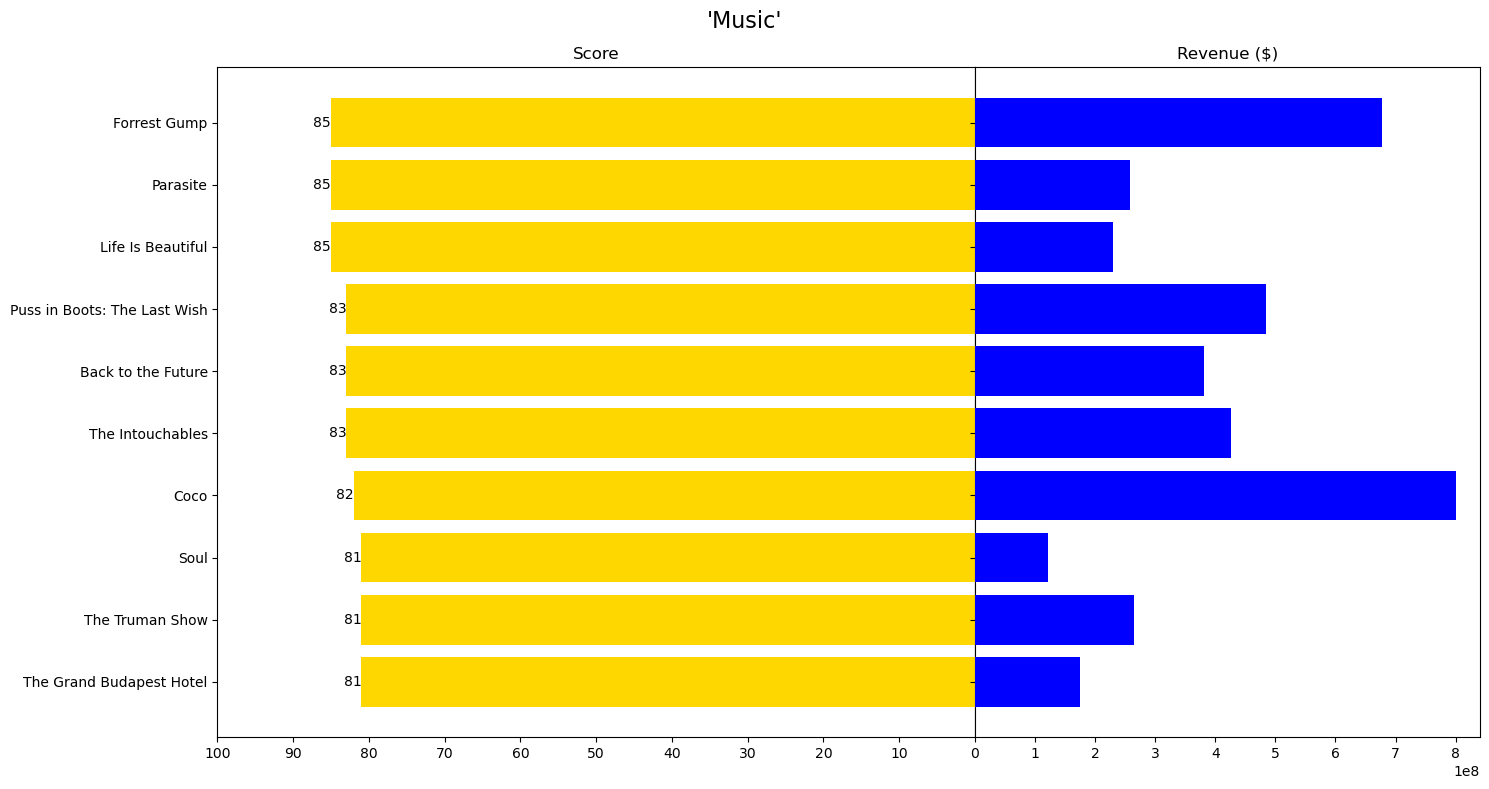

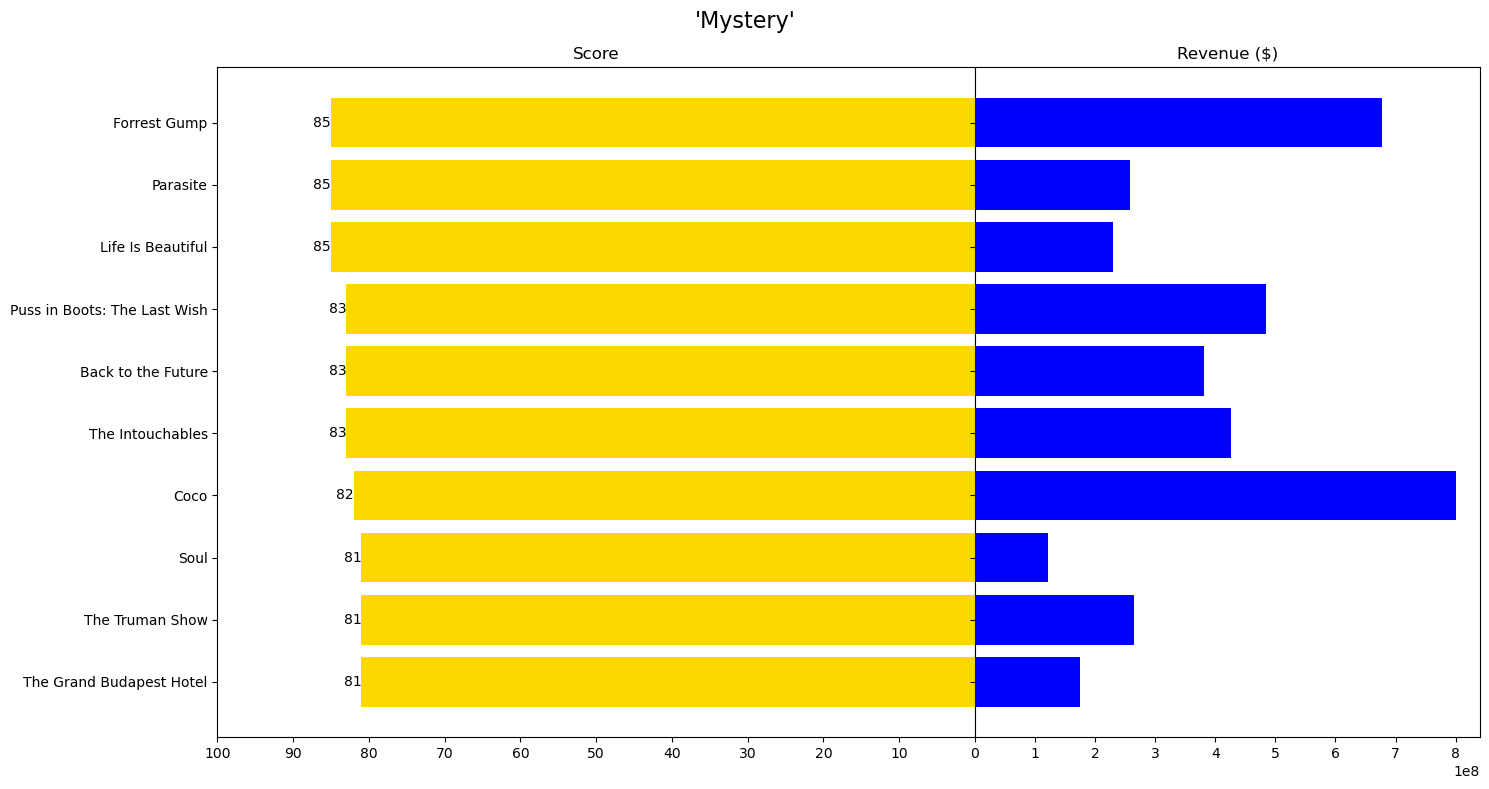

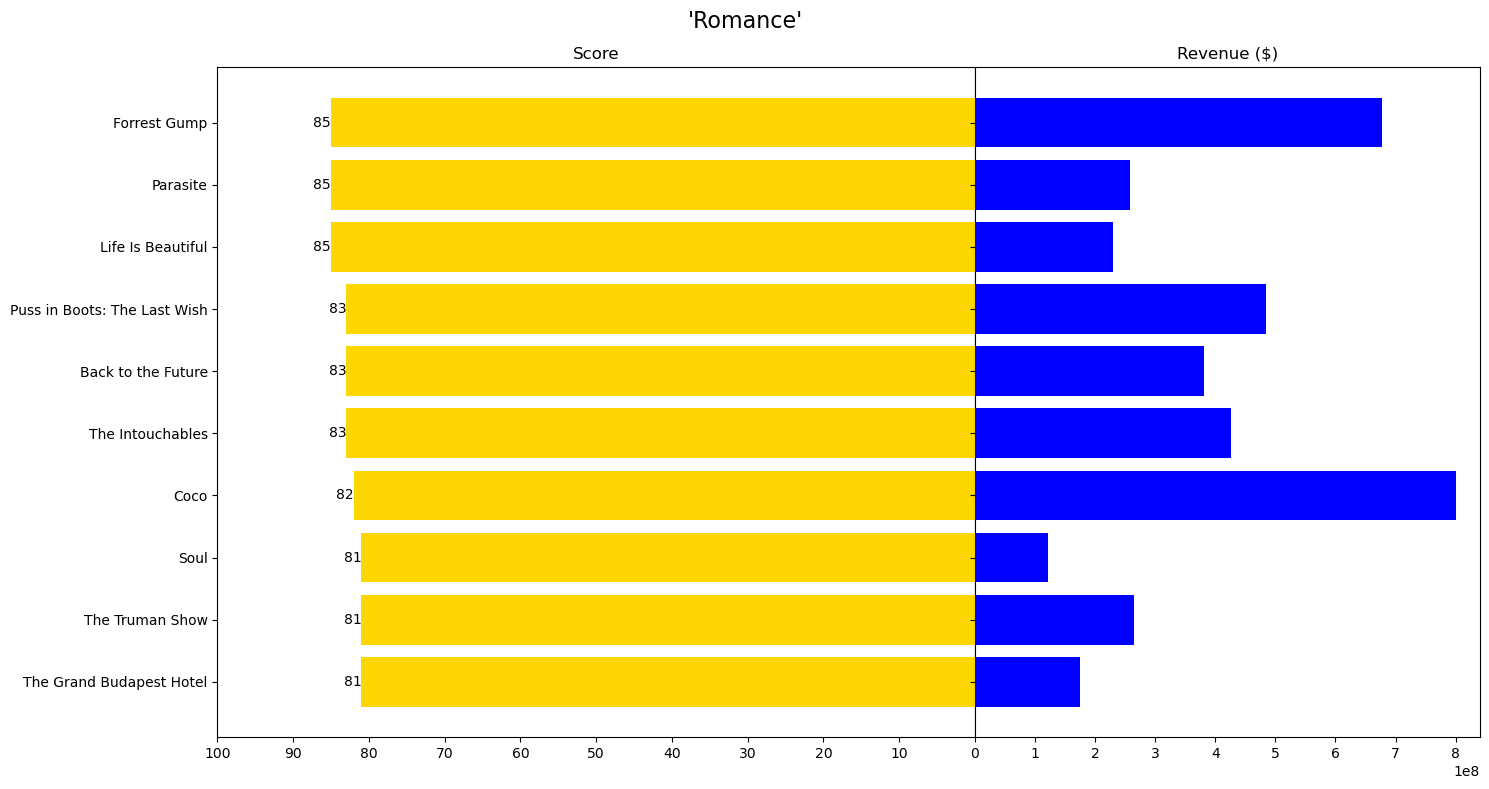

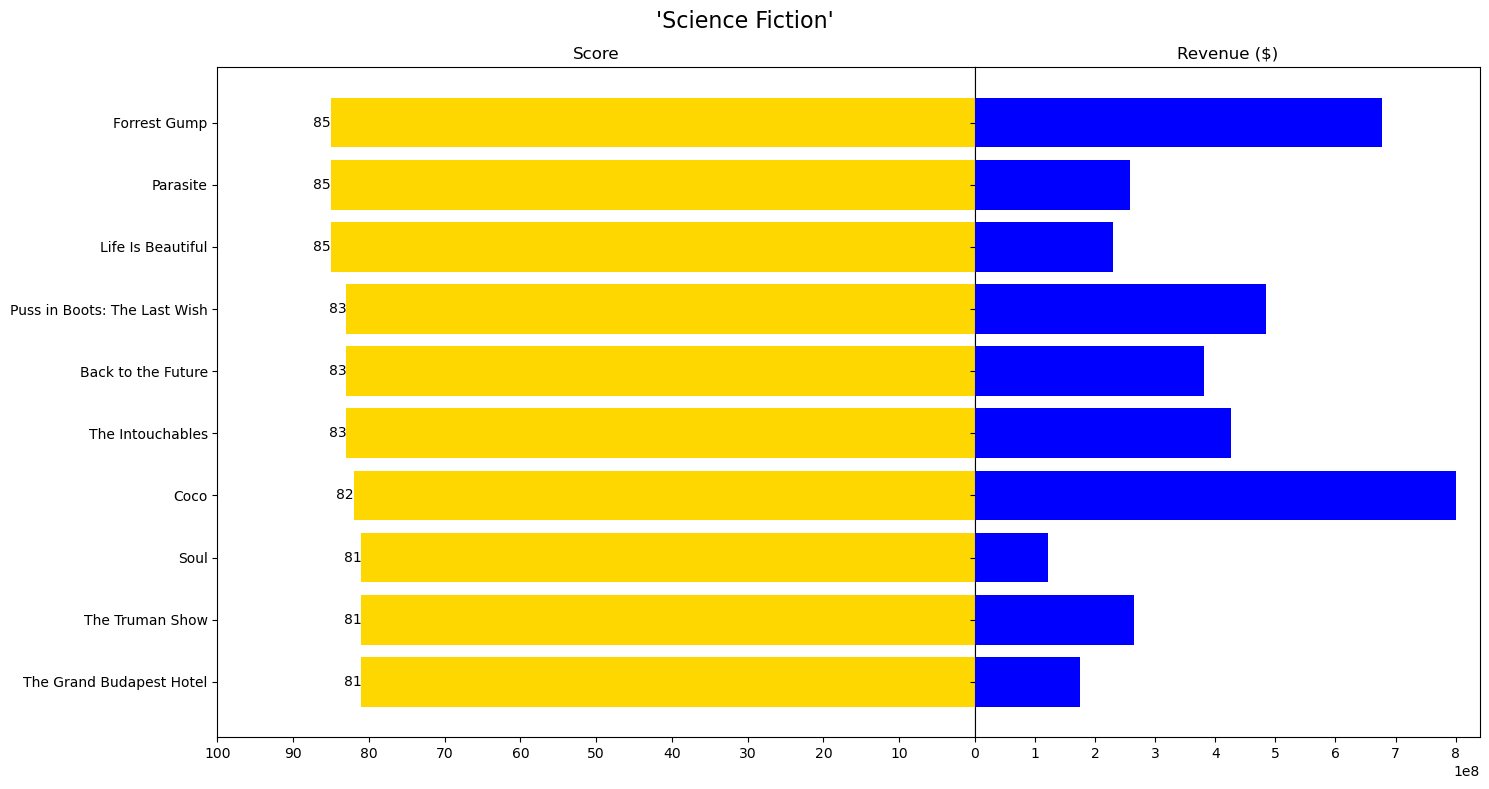

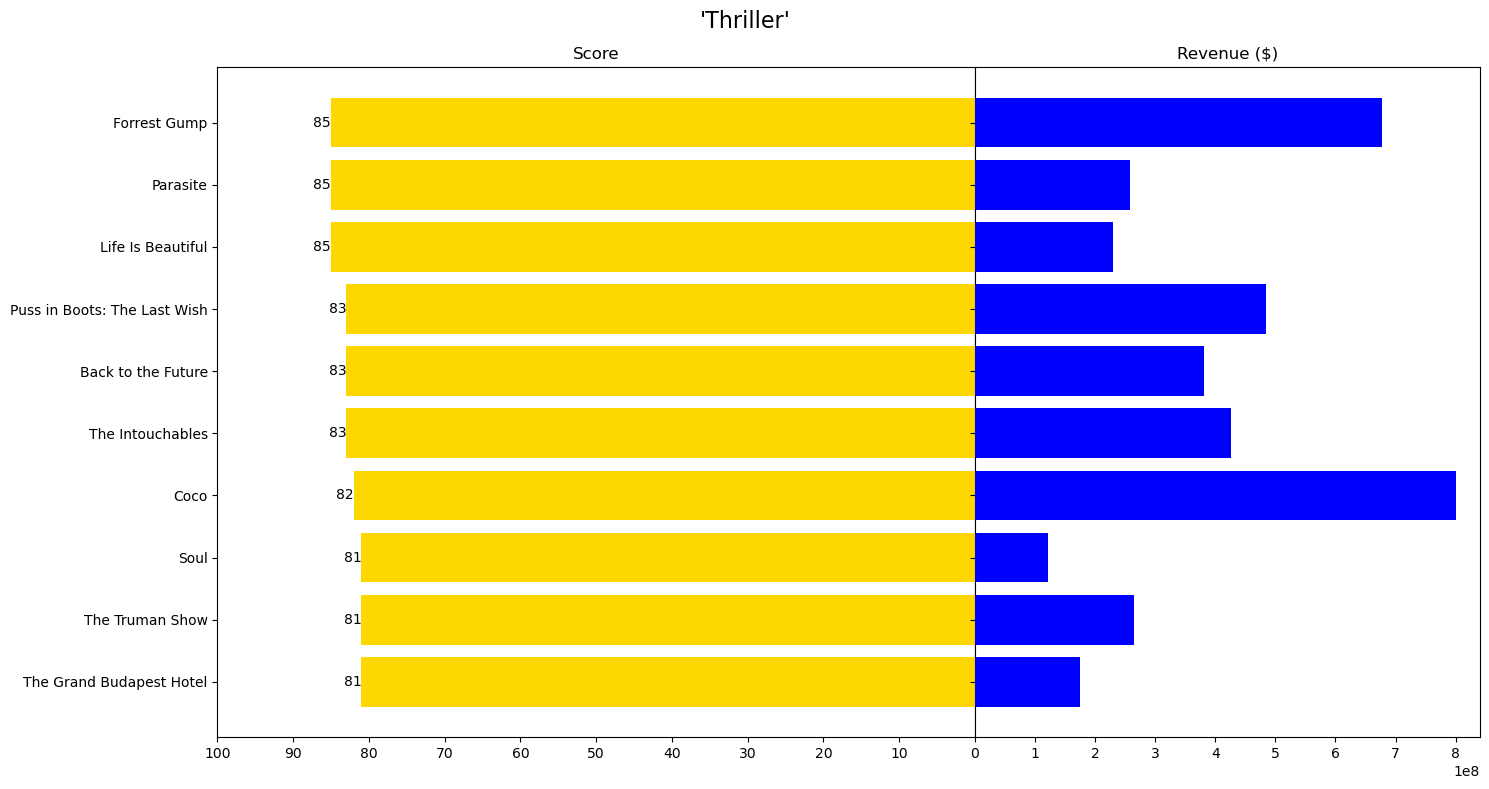

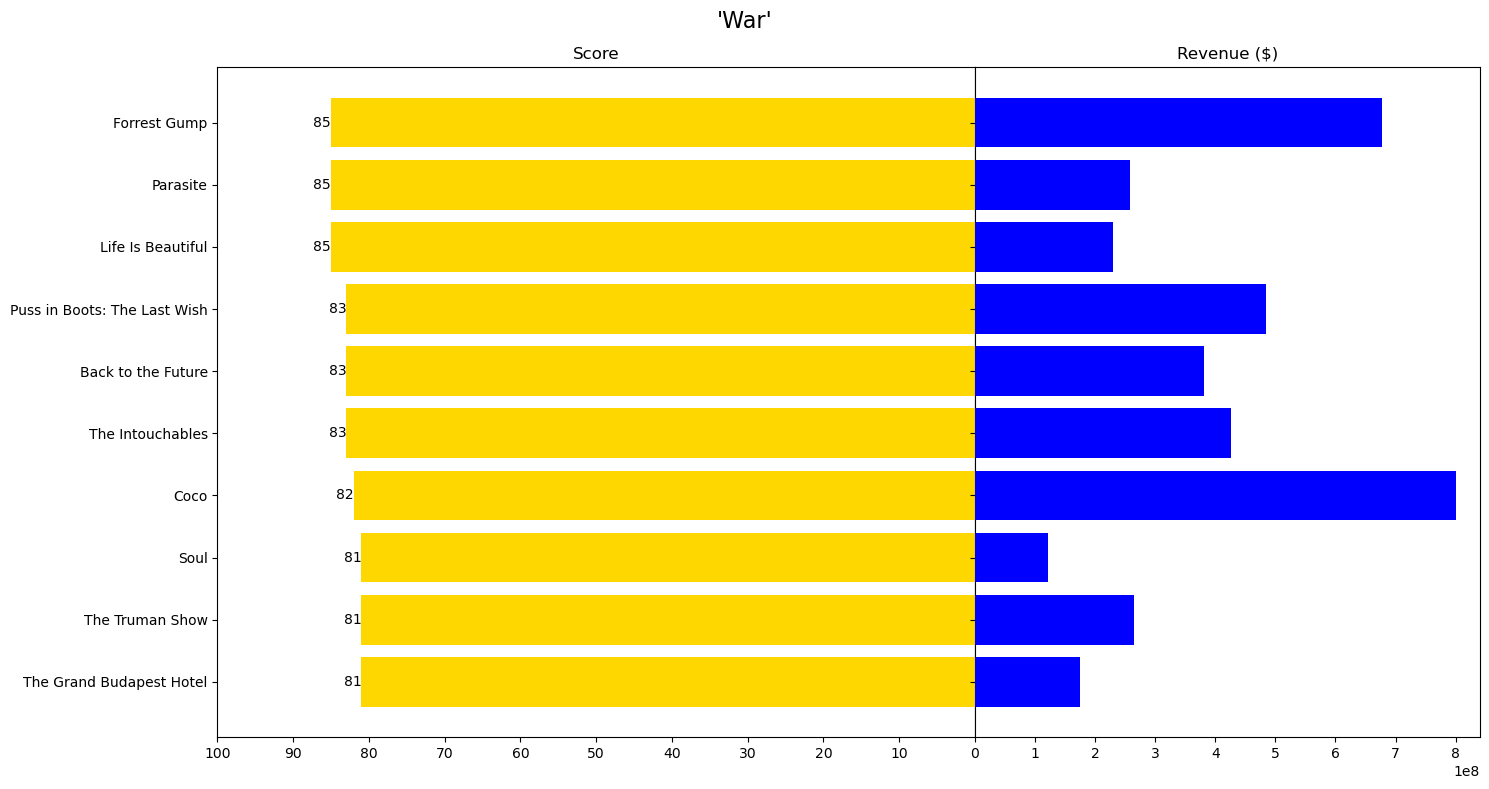

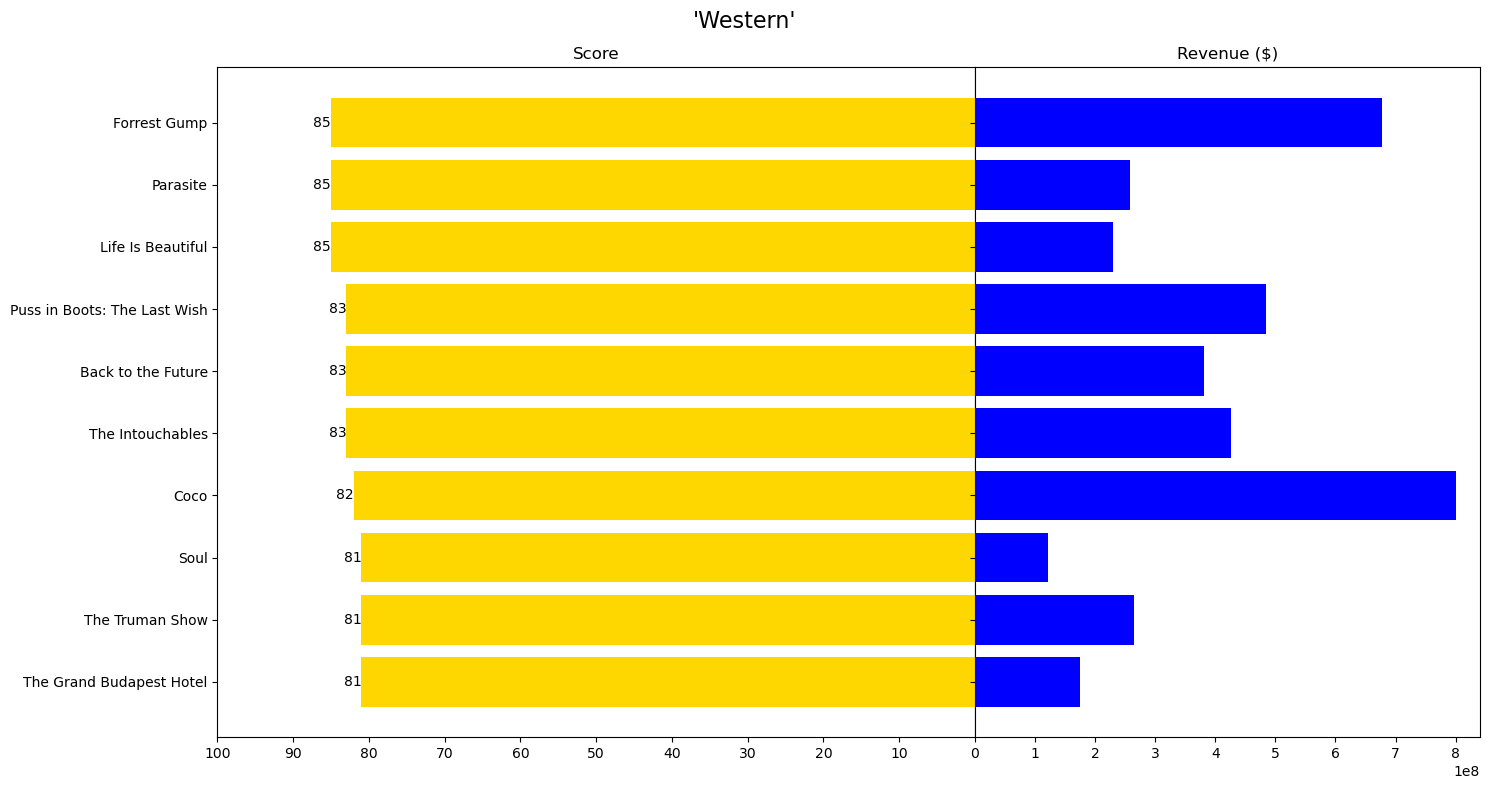

In [12]:
for genre in cleaned_df.Genre.unique():
    df = cleaned_df[cleaned_df['Genre']=="'Comedy'"].iloc[::-1]
    movies = df['Name']
    score = df['Score']
    revenue = df['Revenue ($)']
    
    fig, axes = plt.subplots(figsize=(15,8), ncols=2, sharey=True, gridspec_kw={'width_ratios': [1.5, 1]})
    fig.suptitle(genre,fontsize=16)
    p = axes[0].barh(movies, score, align='center', color='gold', zorder=10)
    axes[0].set(title='Score')
    axes[1].barh(movies, revenue, align='center', color='blue', zorder=10)
    axes[1].set(title='Revenue ($)')
    
    axes[0].invert_xaxis()
    axes[0].set(yticks=movies, yticklabels=movies, xticks=[10,20,30,40,50,60,70,80,90,100])
    axes[0].bar_label(p,label_type='edge')
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0)
    plt.show()

## Step 3: Answer

- Dựa vào đồ thị, ta có thể biết được top 10 các tên bộ phim đáng xem nhất cho từng thể loại.

# Question: Xác định những đạo diễn thành công nhất trong ngành điện ảnh

## Step 0: Benefit

- Tra cứu thông tin những đạo diễn nổi tiếng để nhà làm phim có thể hợp tác thu về lợi nhuận cao hơn.

## Step 1: Preprocessing

In [13]:
cleaned_df = movie_df.groupby('Director')['Revenue ($)'].sum().sort_values(ascending=False).head(10)[::-1]

## Step 2: Visualization

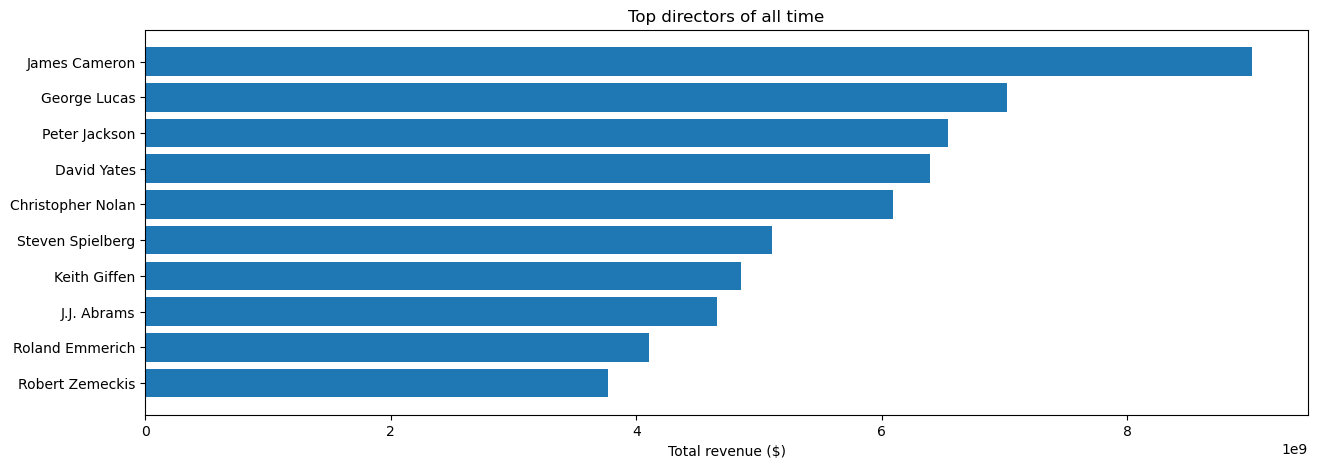

In [14]:
plt.figure(figsize=(15,5))
plt.barh(cleaned_df.index,cleaned_df.values)
plt.title('Top directors of all time')
plt.xlabel('Total revenue ($)')
plt.show()

## Step 3: Answer

- Dựa vào biểu đồ trên ta có thể biết được top 10 đạo diễn thu về doanh thu nhiều nhất từ việc sản xuất phim.

# Question: Độ tương quan của các dữ liệu dạng số

## Step 0: Benefit

Giúp nhà làm phim có thể biết được những thông tin sau:
- Theo thời gian, các chỉ số về kinh phí, doanh thu, điểm số, thời lượng của bộ phim có sự thay đổi như thế nào.
- Liệu phim có điểm số cao thì doanh thu và kinh phí sẽ cao.
- Kinh phí tăng thì doanh thu sẽ thay đổi như thế nào.
- Thời lượng của bộ phim có liên hệ gì với các chỉ số còn lại hay không.
    

## Step 1: Preprocessing

In [20]:
cleaned_df = movie_df.select_dtypes(include='number')

## Step 2: Visualization

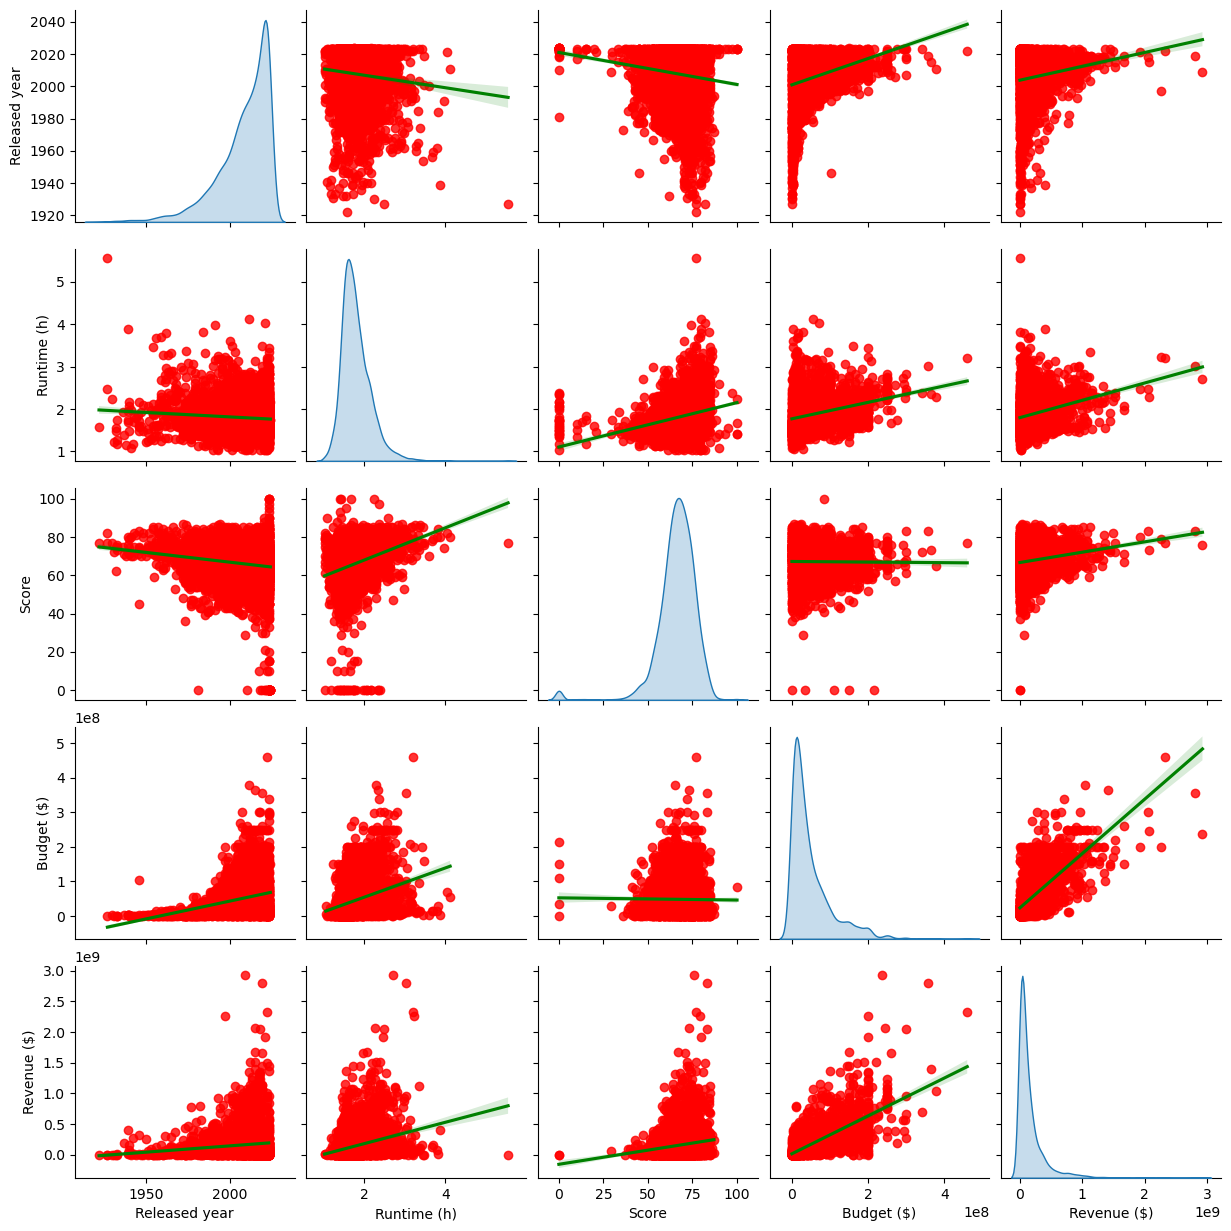

In [16]:
sns.pairplot(cleaned_df, kind='reg', diag_kind="kde", plot_kws={'scatter_kws': {'color': 'red'}, 'line_kws': {'color': 'green'}})
plt.show()

## Step 3: Answer

- Theo thời gian, kinh phí và doanh thu của bộ phim có xu hướng tăng dần.
- Thời lượng của một bộ phim càng cao thì đánh giá của bộ phim cũng có xu hướng tăng lên.
- Kinh phí và doanh thu là 2 đại lượng có tương quan dương rõ nét nhất.
- Một bộ phim có đánh giá cao thì chưa chắc bộ phim đó có kinh phí và doanh thu cao.

# Question: Xác định 2 thể loại phim thường được kết hợp với nhau


## Step 0: Benefit

- Giúp nhà làm phim có thể biết được những thể loại phim nào có thể kết hợp với nhau dễ dàng, từ đó tăng lợi nhuận cho công ty dựa trên những thể loại phổ biến mà khán giả thường chọn để xem.

## Step 1: Preprocessing

In [17]:
cleaned_df = movie_df[['Name','Genre','Score','Revenue ($)']].reset_index(drop=True)
cleaned_df['Genre'] = cleaned_df['Genre'].str.split(', ')
cleaned_df = cleaned_df.explode('Genre').query('Genre == Genre')
temp = cleaned_df[(cleaned_df['Genre']=="'Action'")|(cleaned_df['Genre']=="'Thriller'")].index
temp = temp.shape[0]-temp.nunique()
df = pd.DataFrame(index=cleaned_df['Genre'].unique(),columns=cleaned_df['Genre'].unique())

In [18]:
for i in range(len(cleaned_df['Genre'].unique())-1):
    for j in range(i+1,len(cleaned_df['Genre'].unique())):
        temp = cleaned_df[(cleaned_df['Genre']==cleaned_df['Genre'].unique()[i])|(cleaned_df['Genre']==cleaned_df['Genre'].unique()[j])].index
        df.at[cleaned_df['Genre'].unique()[i],cleaned_df['Genre'].unique()[j]] = temp.shape[0]-temp.nunique() if temp.shape[0]-temp.nunique() else 0
df = df.T.fillna(0)

## Step 2: Visualization

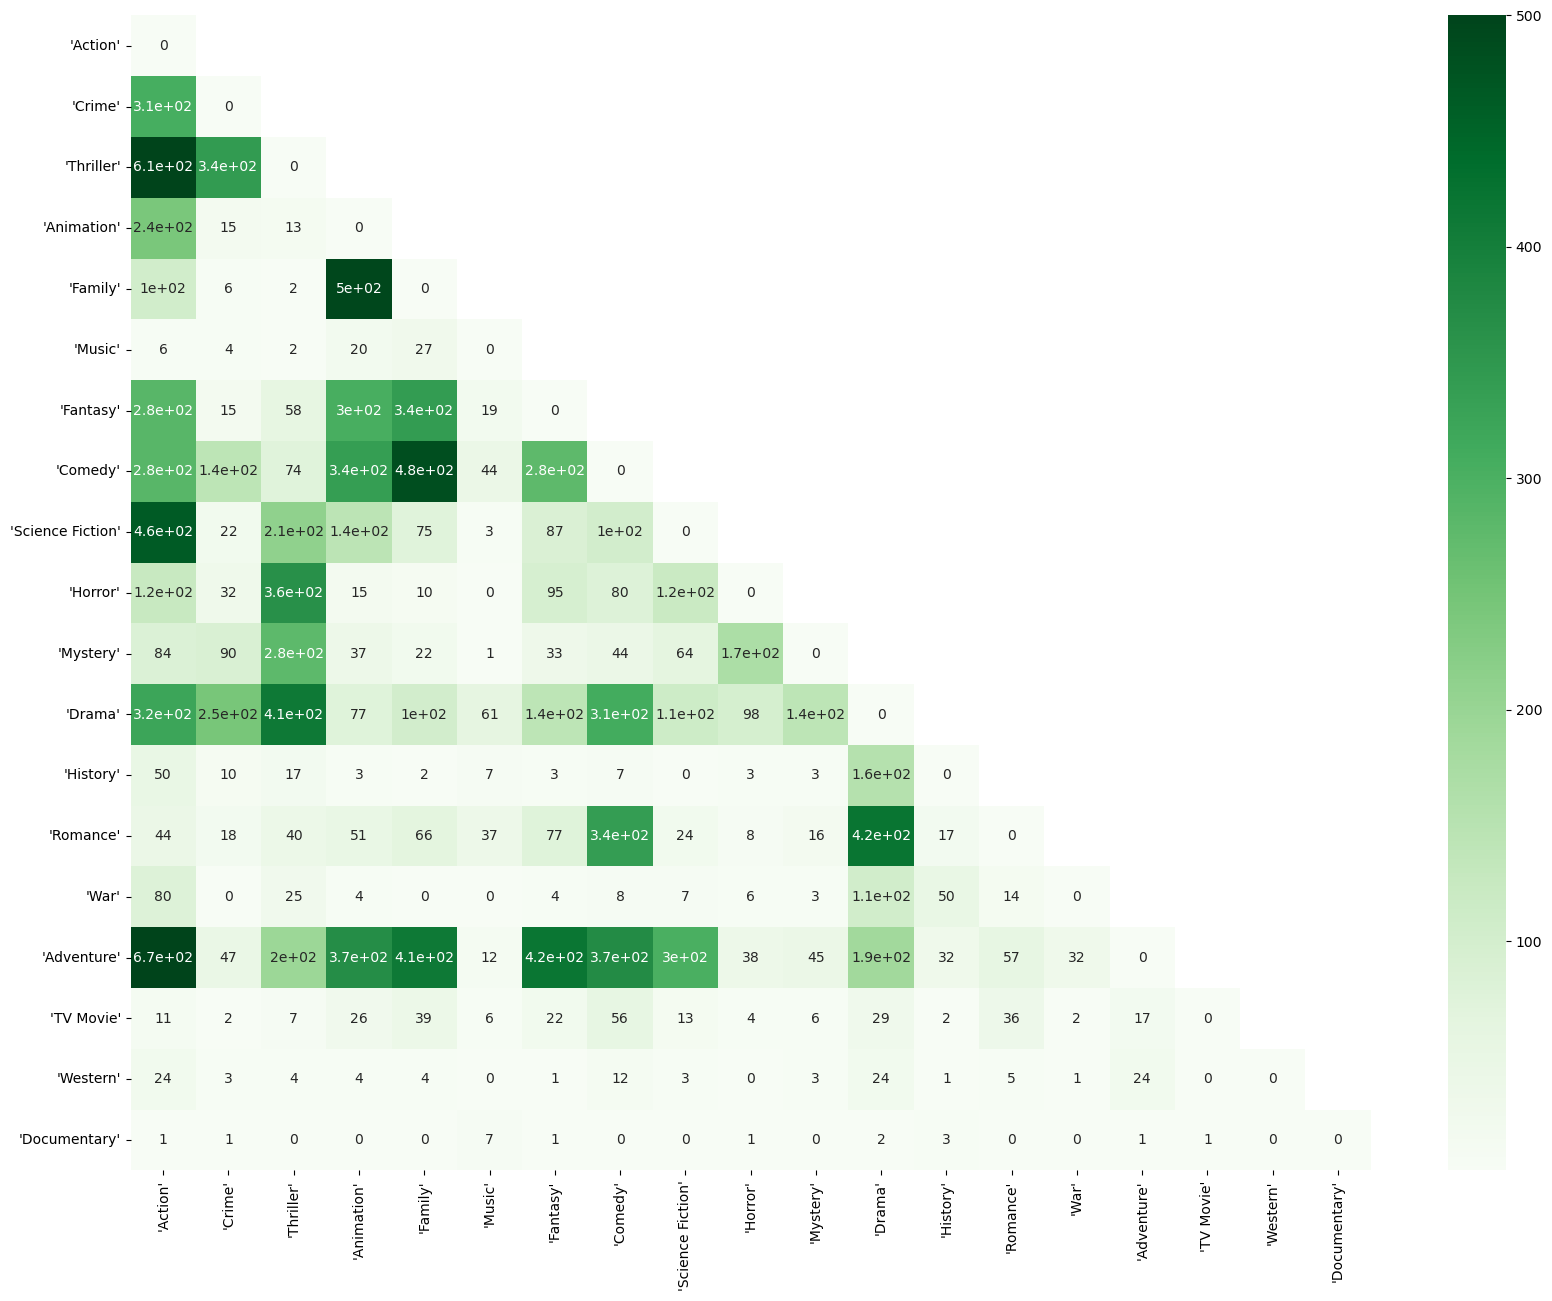

In [19]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df), k=1)
sns.heatmap(df,annot=True,cmap='Greens',mask=mask, vmin=1, vmax=500)
plt.show()

## Step 3: Answer

- `Action`, `Adventure`, `Thriller` thường đi chung với nhau.
- `Animation`, `Family`, `Comedy` thường đi chung với nhau.

---

***JUNK***
- Thời lượng của một bộ phim ảnh hưởng đến kinh phí của bộ phim đó như thế nào?
> Dữ liệu làm phim có ý nghĩa với nhà làm phim như thế nào

- Lợi nhuận thuần, lợi nhuận ròng và lợi nhuận gộp trung bình của thị trường sản xuất phim hiện tại (Cho nhà sản xuất).
- Trong những bộ phim có doanh thu khủng, những bộ phim có đánh giá cao nhất (Cho khán giả) theo từng thể loại. Những bộ phim đáng xem nhất
- Xác định thời lượng lý tưởng cho một bộ phim. (Bubble plot)

> Xác định thời lượng lý tưởng cho một bộ phim (mối quan hệ thời lượng, doanh thu và điểm số)
> 
> Xác định số lượng phim của từng thể loại qua từng năm (Heatmap)
> 
> Xác định những bộ phim đáng xem nhất của từng thể loại.
> 
> Xác định những tác giả thành công nhất trong ngành điện ảnh
> 
> Xác định lợi nhuận, lợi nhuận ròng của ngành điện ảnh qua các năm
> 
> Collerogram về độ tương quan của các dữ liệu dạng số
> 
> Xác định 2 thể loại phim nào có thể kết hợp được với nhau


> Xử lý dữ liệu bị lệch

> ***REFERENCE:***
> - https://govalue.vn/bien-loi-nhuan-rong/

